In [12]:
from agent import Agent
from agent_distribution import AgentDistribution
from utils import fixed_point_interpolation_true_distribution, compute_score_bounds
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, norm
import tqdm
import numpy as np
from scipy.misc import derivative
from utils import compute_continuity_noise
#from gradient_expected import expected_gradient_pi_beta, expected_gradient_pi_s, plot_grad_pi_beta, plot_grad_pi_s

In [13]:
agent_dist = AgentDistribution(n=10000, n_types=1)
sigma = compute_continuity_noise(agent_dist)

In [14]:
agent = agent_dist.agents[0]

In [15]:
theta = np.pi/4
beta = np.array([np.cos(theta), np.sin(theta)]).reshape(2, 1)

br_score_function_s = agent.br_score_function_s(beta, sigma)

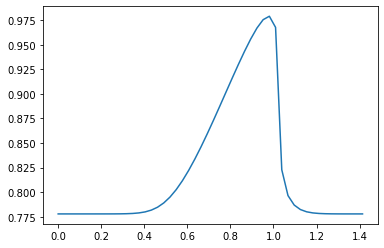

In [16]:
bounds = compute_score_bounds(beta)
dr = 0.001
rs = np.linspace(bounds[0]+dr, bounds[1]-dr, 50)
dtheta = 0.001
plt.plot(rs, br_score_function_s(rs))

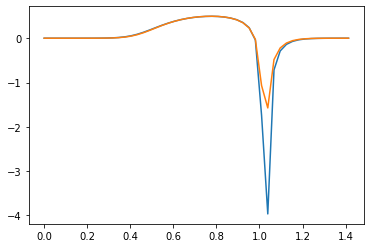

In [17]:
plt.plot(rs, [derivative(br_score_function_s, r, dtheta) for r in rs] )
plt.plot(rs, [np.matmul(beta.T, agent.br_gradient_s(beta, r, sigma)[1]).item() for r in rs])

In [8]:
dtheta = 0.1
thetas = np.linspace(-np.pi +dtheta, np.pi-dtheta, 50)
br_score_function_beta, valid_thetas = agent.br_score_function_beta(0.5, sigma)

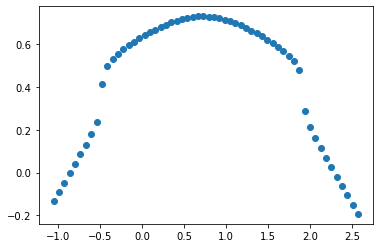

In [9]:
plt.scatter(valid_thetas, br_score_function_beta(valid_thetas))

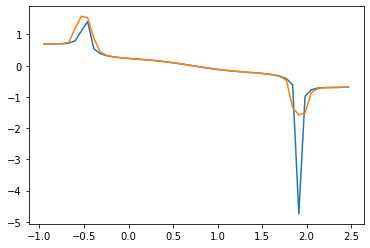

In [10]:
vals = []
valid_thetas_trunc = np.linspace(valid_thetas[0]+dtheta, valid_thetas[-1]-dtheta, 50)
for theta in valid_thetas_trunc:
    beta = np.array([np.cos(theta), np.sin(theta)]).reshape(2, 1)
    br, grad_theta = agent.br_gradient_theta(theta, 0.5, sigma)
    dbeta_dtheta = np.array([-np.sin(theta), np.cos(theta)]).reshape(2, 1)
    res = np.matmul(beta.T, grad_theta) + np.matmul(dbeta_dtheta.T, br)
    vals.append(res.item())
    

plt.plot(valid_thetas_trunc, vals)
derivs = [derivative(br_score_function_beta, x, dtheta) for x in valid_thetas_trunc]
plt.plot(valid_thetas_trunc, derivs )
